In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
pd.crosstab(data.Gender, data.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [7]:
data.groupby(['Purchased']).min()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,15566689,Female,18,15000
1,15569641,Female,27,20000


In [8]:
data.groupby(['Purchased']).max()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,15814816,Male,59,141000
1,15815236,Male,60,150000


In [9]:
data.groupby(['Purchased']).mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


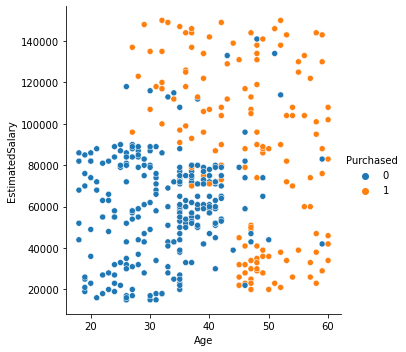

In [10]:
sns.relplot(data = data, x = 'Age' , y = 'EstimatedSalary', hue = 'Purchased')

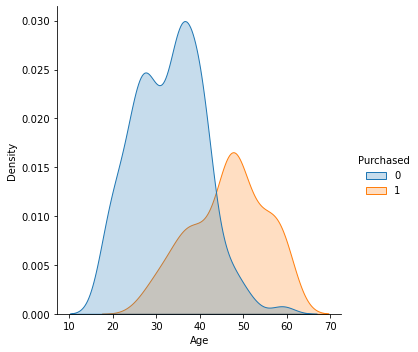

In [11]:
sns.displot(data, x = 'Age', hue='Purchased', kind='kde', fill=True)

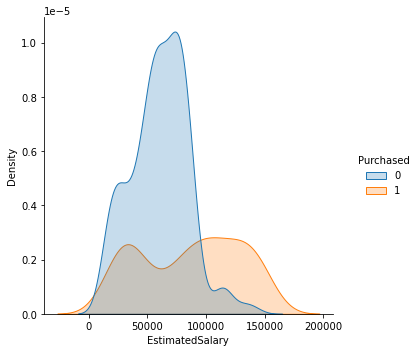

In [12]:
sns.displot(data, x = 'EstimatedSalary', hue='Purchased', kind='kde', fill=True)

In [13]:
X = data.iloc[:,[1,2,3]]
y = data.iloc[:,[4]]

In [14]:
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [15]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lb = LabelEncoder()
X['Gender']= lb.fit_transform(data.Gender)

In [18]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320, 1)
(80, 1)


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train[0]

array([1.02532046, 1.92295008, 2.14601566])

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
gn = GaussianNB()
gn.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = gn.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56  2]
 [ 4 18]]


<AxesSubplot:>

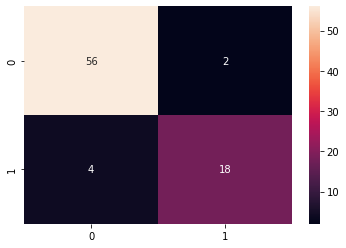

In [30]:
sns.heatmap(cm, annot= True)

In [31]:
ac = accuracy_score(y_test, y_pred)

In [32]:
ac

0.925